## 311 complaint dataset 

Problem Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

1.  Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
2.  Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
3.  Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
4. Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?


## Metadata explaination

### Column Name                                          Description
***
1.Unique Key:	                Unique identifier of a Service Request (SR) in the open data set<br>
2.Created Date:                 Date SR  was created<br>
3.Closed Date:                  Date SR was closed by responding agency<br>
4.Complaint Type:               This is the first level of a hierarchy identifying the topic of the incident or condition.<br>
5.Status:                       Status of SR submitted<br>
6.Resolution Description:       Describes the last action taken on the SR by the responding agency.<br>
7.Location Type:                Describes the type of location used in the address information<br>
8.Incident Zip:                 Incident location zip code, provided by geo validation.<br>
9.Incident Address:             House number of incident address provided by submitter.<br>
10.Street Name:                 Street name of incident address provided by the submitter<br>
11.Address Type:                Type of incident location information available.<br>
12.City:                        City of the incident location provided by geovalidation.<br>
13.Borough:                     Provided by the submitter and confirmed by geovalidation.<br>
14.Latitude:                    Geo based Lat of the incident location<br>
15.Longitude:                   Geo based Long of the incident location

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine import missing_data_imputers as msi
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
from feature_selector import FeatureSelector
import warnings
warnings.warn("ignore")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: ignore
  # Remove the CWD from sys.path while we load stuff.


In [2]:
df = pd.read_csv('NYC 311 Experiment - Results dataset.csv', parse_dates=True)

In [3]:
#What are number of rows and columns
df.shape     
#5540650 rows, 15 columns

(5540650, 15)

In [4]:
#Are there any suspicious variables?
df.columns.values

array(['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
       'created_date', 'incident_address', 'incident_zip', 'latitude',
       'location_type', 'longitude', 'resolution_description', 'status',
       'street_name', 'unique_key'], dtype=object)

In [5]:
#Display the variable formats
df.dtypes

address_type               object
borough                    object
city                       object
closed_date                object
complaint_type             object
created_date               object
incident_address           object
incident_zip              float64
latitude                  float64
location_type              object
longitude                 float64
resolution_description     object
status                     object
street_name                object
unique_key                  int64
dtype: object

In [6]:
#Print the first 10 observations
df.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,ADDRESS,BROOKLYN,BROOKLYN,11/23/2015 10:29:49 AM,DOOR/WINDOW,11/7/2015 10:16:55 AM,397 1 STREET,11215.0,40.672571,RESIDENTIAL BUILDING,-73.979307,The Department of Housing Preservation and Dev...,Closed,1 STREET,31929828
1,ADDRESS,MANHATTAN,NEW YORK,1/31/2016 11:50:51 AM,DOOR/WINDOW,11/7/2015 6:50:53 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929829
2,ADDRESS,MANHATTAN,NEW YORK,11/20/2015 9:11:31 AM,DOOR/WINDOW,11/7/2015 11:09:57 PM,3851 BROADWAY,10032.0,40.836272,RESIDENTIAL BUILDING,-73.943274,The Department of Housing Preservation and Dev...,Closed,BROADWAY,31929830
3,ADDRESS,BROOKLYN,BROOKLYN,11/16/2015 12:25:46 PM,DOOR/WINDOW,11/7/2015 2:05:52 PM,1555 NOSTRAND AVENUE,11226.0,40.648298,RESIDENTIAL BUILDING,-73.949293,The Department of Housing Preservation and Dev...,Closed,NOSTRAND AVENUE,31929831
4,ADDRESS,BRONX,BRONX,12/3/2015 9:38:12 AM,DOOR/WINDOW,11/6/2015 1:02:50 PM,1808 MULFORD AVENUE,10461.0,40.847490,RESIDENTIAL BUILDING,-73.835112,The Department of Housing Preservation and Dev...,Closed,MULFORD AVENUE,31929832


In [7]:
#Do we have any unique identifier?
df.columns.values
#unique_key is identifier

array(['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
       'created_date', 'incident_address', 'incident_zip', 'latitude',
       'location_type', 'longitude', 'resolution_description', 'status',
       'street_name', 'unique_key'], dtype=object)

In [8]:
df.describe()

,incident_zip,latitude,longitude,unique_key
count,5.459752e+06,5.459778e+06,5.459778e+06,5.540650e+06
mean,1.074921e+04,4.075384e+01,-7.391986e+01,2.838510e+07
std,5.129698e+02,9.091130e-02,5.685644e-02,7.099633e+06
min,1.000100e+04,4.049934e+01,-7.425312e+01,1.562973e+07
25%,1.045200e+04,4.067100e+01,-7.395194e+01,2.252885e+07
50%,1.046900e+04,4.075588e+01,-7.392252e+01,2.804634e+07
75%,1.122400e+04,4.083941e+01,-7.389030e+01,3.449319e+07
max,1.234500e+04,4.091287e+01,-7.370079e+01,4.147464e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540650 entries, 0 to 5540649
Data columns (total 15 columns):
address_type              object
borough                   object
city                      object
closed_date               object
complaint_type            object
created_date              object
incident_address          object
incident_zip              float64
latitude                  float64
location_type             object
longitude                 float64
resolution_description    object
status                    object
street_name               object
unique_key                int64
dtypes: float64(3), int64(1), object(11)
memory usage: 634.1+ MB


### Summary of data types

address_type&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;              DISCRETE<br>
borough&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                   DISCRETE<br>
city&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                      DISCRETE<br>
closed_date&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;               DATETIME<br>
complaint_type&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;            DISCRETE<br>
created_date&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;              DATETIME<br>
incident_address&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          STRING<br>
incident_zip&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;              NUMERIC<br>
latitude&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                  NUMERIC<br>
location_type&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;             STRING<br>
longitude&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                 NUMERIC<br>
resolution_description&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    STRING<br>
status&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                    DISCRETE<br>
street_name&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;               STRING<br>
unique_key&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                NUMERIC<br>

In [10]:
#Find the frequencies of all class variables in the data 
df['address_type'].value_counts(sort=False)

ADDRESS    5462484
Name: address_type, dtype: int64

In [11]:
df['borough'].value_counts(sort=False)

Unspecified       872904
STATEN ISLAND      79628
MANHATTAN         953436
BROOKLYN         1591614
QUEENS            583835
BRONX            1459233
Name: borough, dtype: int64

In [12]:
df['city'].value_counts(sort=False)

Springfield Gardens       6721
Rego Park                12827
BREEZY POINT                53
Middle Village            2524
Maspeth                   3722
Hollis                    6839
JAMAICA                  31814
RIDGEWOOD                15272
Woodside                 18885
ASTORIA                  17578
MIDDLE VILLAGE            1298
Ozone Park                8932
Bayside                   2875
OZONE PARK                4877
SAINT ALBANS              4478
Jamaica                  58765
FRESH MEADOWS             1132
STATEN ISLAND            93553
Glen Oaks                  480
COLLEGE POINT             1140
FLUSHING                 16438
Forest Hills             12809
LONG ISLAND CITY          2632
Little Neck                928
SOUTH OZONE PARK          3817
BELLEROSE                  393
KEW GARDENS               3259
RICHMOND HILL             5124
Long Island City          7092
SUNNYSIDE                 5138
                        ...   
New Hyde Park               73
Belleros

In [13]:
df['closed_date'].value_counts(sort=False)

9/20/2017 7:11:07 PM       4
10/5/2017 2:07:45 AM       1
10/19/2015 8:34:21 PM     12
6/1/2016 2:12:20 AM        2
10/20/2015 11:36:15 AM     1
1/23/2018 12:46:56 PM      3
9/3/2015 10:05:16 PM       7
12/8/2018 2:07:59 AM       6
8/29/2018 1:38:46 PM       3
11/10/2015 9:34:55 PM      9
11/22/2017 9:42:50 AM      5
3/13/2018 11:30:48 AM      1
12/28/2017 1:34:23 PM      1
8/12/2018 8:22:08 AM       1
12/28/2016 1:40:51 PM      1
2/9/2016 10:21:47 AM      11
12/6/2016 10:16:32 PM     11
11/27/2018 2:05:57 AM      4
7/11/2017 4:34:42 PM       1
4/15/2018 2:08:40 AM       2
7/15/2016 10:57:21 AM      7
8/24/2017 10:26:42 AM      3
3/24/2016 10:42:03 AM      4
12/10/2018 6:54:52 PM      2
5/26/2017 2:06:30 AM       3
12/18/2015 9:53:37 AM      1
12/5/2017 11:11:33 AM      1
3/13/2018 2:12:15 AM       9
9/12/2016 3:32:50 PM       5
10/19/2015 8:44:07 AM     10
                          ..
12/13/2017 11:15:45 AM     2
2/22/2017 2:24:36 PM       3
1/26/2018 2:10:43 AM       1
1/10/2018 4:54

In [14]:
df['complaint_type'].value_counts(sort=False)

PAINT/PLASTER              311722
ELEVATOR                     5577
PLUMBING                   673952
HPD Literature Request      52548
UNSANITARY CONDITION       391136
STRUCTURAL                     16
CONSTRUCTION                 5078
NONCONST                   260890
ELECTRIC                   289563
FLOORING/STAIRS            123004
HEATING                    887869
WATER LEAK                 168063
GENERAL                    132219
PAINT - PLASTER            361258
DOOR/WINDOW                179839
GENERAL CONSTRUCTION       500863
VACANT APARTMENT                8
OUTSIDE BUILDING             6532
HEAT/HOT WATER            1044392
SAFETY                      44195
AGENCY                          9
APPLIANCE                  101917
Name: complaint_type, dtype: int64

In [15]:
df['created_date'].value_counts(sort=False)

2/1/2016 10:28:34 AM      1
2/23/2018 2:45:38 PM      1
2/11/2017 10:26:12 AM     1
8/8/2017 11:01:15 AM      5
1/16/2017 10:46:30 AM     1
6/21/2017 8:52:58 AM      1
6/8/2018 9:15:12 AM       6
1/11/2016 7:26:09 PM      1
3/23/2016 11:55:40 AM     1
11/30/2015 6:51:02 AM     1
7/27/2016 1:20:32 PM      1
6/22/2016 1:17:15 PM      5
8/8/2018 9:59:57 PM       1
6/7/2017 3:45:10 PM       1
2/9/2018 5:08:16 PM       1
1/7/2017 10:49:49 AM      1
2/4/2017 4:57:24 PM       1
4/10/2018 10:44:29 AM     1
1/10/2018 11:49:34 AM     5
7/18/2015 12:39:58 PM     1
11/28/2015 10:24:36 PM    1
10/20/2018 1:01:06 PM     1
7/13/2011 12:02:29 PM     1
6/3/2016 10:51:20 AM      1
2/29/2016 6:52:40 AM      1
1/31/2018 2:30:31 PM      1
6/4/2018 10:08:58 AM      4
11/8/2018 5:37:58 PM      3
1/23/2016 3:45:26 PM      1
10/26/2018 8:24:16 PM     1
                         ..
5/8/2015 10:44:11 AM      1
9/20/2017 10:36:50 PM     1
1/12/2016 8:42:47 AM      1
1/18/2019 10:04:35 PM     1
12/5/2015 8:26:55 AM

In [16]:
df['incident_address'].value_counts(sort=False)

940 SHERIDAN AVENUE            167
527 WEST  151 STREET            18
316 EAST 70 STREET               6
1694 CARROLL STREET              7
561 EAST  187 STREET            29
77-14 138 STREET                 9
1673 76 STREET                   1
75 EAST 4 STREET                 2
29 EAST 95 STREET                4
86-48 125 STREET                41
9109 SEAVIEW AVENUE              1
323 HUDSON STREET                1
1891 BERGEN STREET               4
178 BEACH 92 STREET             43
604 ONDERDONK AVENUE             3
88-24 204 STREET                17
1099 SIMPSON STREET              4
2534 CONEY ISLAND AVENUE         2
95-15 156 AVENUE                 3
121 EAST 119 STREET             22
53-15 105 STREET                 1
385 PROSPECT AVENUE             15
32-57 85 STREET                  8
147-41 HOOK CREEK BOULEVARD     20
2558 TIEMANN AVENUE              1
1891 STOCKHOLM STREET            1
126-13 JAMAICA AVENUE           18
462 HANCOCK STREET              34
372 UNION AVENUE    

In [17]:
df['incident_zip'].value_counts(sort=False)

10001.0      8386
10002.0     29214
10003.0     23434
10004.0       294
10005.0       378
10006.0       405
10007.0       483
10009.0     30273
10010.0      8445
10011.0     20602
10012.0     12121
10013.0      8566
10014.0     15559
10016.0     17216
10017.0      2721
10018.0      3598
10019.0     22787
10020.0         4
10021.0      9856
10022.0      9840
10023.0     13960
10024.0     23866
10025.0     51888
10026.0     34035
10027.0     57566
10028.0     15938
10029.0     48808
10030.0     43545
10031.0    113841
10032.0    102011
            ...  
11385.0     43850
11411.0      2652
11412.0     12583
11413.0     10398
11414.0      4117
11415.0     11574
11416.0      7332
11417.0      6571
11418.0     13770
11419.0     14747
11420.0     11385
11421.0     11770
11422.0      6781
11423.0     11561
11426.0       974
11427.0      4919
11428.0      3639
11429.0      6389
11430.0         2
11432.0     24698
11433.0     19119
11434.0     19444
11435.0     21065
11436.0      6251
11691.0   

In [18]:
df['latitude'].value_counts(sort=False)

40.666619      5
40.700884      4
40.765165     17
40.724696      1
40.837229     72
40.687106      2
40.711534     23
40.671947      2
40.698129     53
40.633316      6
40.771496      3
40.795045      1
40.878910      8
40.686806      4
40.686033     55
40.676184      4
40.631122      8
40.813362      6
40.879307     73
40.849815     80
40.652196     57
40.631968      6
40.886128      1
40.684872      4
40.705807      2
40.784072    103
40.723734     16
40.851216     97
40.676224      2
40.805266      1
            ... 
40.803041      6
40.846388     74
40.873028     39
40.698519     12
40.863644      1
40.684891      7
40.665460      3
40.638567     38
40.742586      4
40.724304      4
40.715680      1
40.683873      2
40.863940    138
40.816995    309
40.828408    130
40.636362      1
40.760562      6
40.691696      2
40.803259    175
40.704449     17
40.704362     12
40.737255      1
40.682616      4
40.696576     10
40.709009      5
40.575571      1
40.694395      4
40.672466     

In [19]:
df['location_type'].value_counts(sort=False)

RESIDENTIAL BUILDING    5488102
Name: location_type, dtype: int64

In [20]:
df['longitude'].value_counts(sort=False)

-73.958722      2
-73.857682      1
-73.836798     35
-73.984005      3
-74.007844     11
-73.921455      1
-73.940420     18
-73.800897      7
-73.928997      1
-73.977669     66
-73.931224     14
-73.763558      7
-73.969753    112
-73.978130      1
-73.904811     16
-73.909274    113
-73.997348     81
-74.085839    101
-73.880913      4
-74.002641      7
-73.988282     36
-73.919190      7
-73.911572      1
-73.982310      2
-73.887943      4
-73.847536      1
-73.923497      8
-73.955162      4
-74.078845      1
-73.913986      1
             ... 
-73.888588    111
-73.948513     22
-73.968595      2
-73.830860      3
-73.851305      1
-73.813208     64
-73.947861      6
-73.862982      2
-73.979860      5
-73.921689      6
-73.751524      2
-74.025149      3
-73.915009      1
-73.898343      2
-73.962420      1
-73.990966      3
-73.943399      7
-73.921524     15
-73.908021     13
-73.878151      6
-73.847451     18
-73.962624     55
-73.939817     12
-73.828288      1
-73.967138

In [21]:
df['resolution_description'].value_counts(sort=False)

More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development responded to a complaint of no heat or hot water. Heat was not required at the time of the inspection. No violations were issued. If the condition still exists, please file a n                                                                                                                          1
The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available                                                                                                                                                             3
More than one complaint was received for this bu

In [22]:
df['status'].value_counts(sort=False)

Closed      5412940
Open         127700
Pending           2
Assigned          8
Name: status, dtype: int64

In [23]:
df['street_name'].value_counts(sort=False)

WEST  125 STREET             1057
WEST TERRACE                    1
WEST 59 STREET                  6
WEST   57 STREET              546
UNION COURT                     9
POPLAR LANE                     3
PALMETTO STREET              2702
BRIGHTON 5 LANE                 2
RED CEDAR LANE                  1
KRISSA COURT                   17
STEUBEN STREET                908
LUCAS STREET                   38
BOWNE STREET                 1682
BEACH   22 STREET             271
GRANDVIEW AVENUE             1125
WEST 87 STREET                907
FOREST GREEN                    1
NEWELL STREET                   2
CLEVELAND AVENUE               48
SANTA MONICA LANE               8
20 DRIVE                        4
SWINTON AVENUE                151
ELDER AVE                       1
BRONX PARK EAST              9283
WEST   38 STREET               44
109 DRIVE                      85
BOUCK AVENUE                  229
WEST 189 STREET              2759
39 ROAD                        38
YOUNG STREET  

In [26]:
df['unique_key'].value_counts(sort=False)

20973569    1
16781314    1
33562628    1
37758981    1
27231850    1
25182216    1
16797706    1
20994059    1
25194510    1
21002255    1
25198608    1
21010451    1
41257106    1
39466744    1
29104981    1
29415451    1
33611804    1
25227294    1
29423647    1
21039137    1
16846882    1
37824549    1
24883513    1
37832745    1
25251882    1
29448235    1
30267851    1
29452333    1
25260078    1
37845039    1
           ..
29780561    1
24078735    1
29439961    1
25243610    1
37824475    1
25239516    1
29431773    1
16846814    1
21039071    1
29423585    1
25227234    1
30991106    1
29415397    1
37799911    1
30384953    1
37795817    1
37791723    1
33595372    1
21010413    1
29394927    1
25198576    1
21002225    1
25194482    1
20994037    1
16797686    1
37574178    1
24811661    1
33562620    1
16781310    1
20973567    1
Name: unique_key, Length: 5540650, dtype: int64

In [27]:
#Rearrange the columns as Label = Complaint Type

#df = df[['address_type', 'borough', 'city', 'closed_date','created_date','incident_address','incident_zip','latitude','longitude','location_type','resolution_description','status','street_name','unique_key','complaint_type']]

## Data Cleaning

In [28]:
#Are there any variables with missing values?
df.isnull().sum()

address_type               78166
borough                        0
city                       80570
closed_date               120809
complaint_type                 0
created_date                   0
incident_address           52549
incident_zip               80898
latitude                   80872
location_type              52548
longitude                  80872
resolution_description      6058
status                         0
street_name                52549
unique_key                     0
dtype: int64

In [29]:
#Drop all missing values from NYC dataset
df.dropna(axis=0, inplace=True)

In [30]:
df.isnull().sum()

address_type              0
borough                   0
city                      0
closed_date               0
complaint_type            0
created_date              0
incident_address          0
incident_zip              0
latitude                  0
location_type             0
longitude                 0
resolution_description    0
status                    0
street_name               0
unique_key                0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5342068 entries, 0 to 5540649
Data columns (total 15 columns):
address_type              object
borough                   object
city                      object
closed_date               object
complaint_type            object
created_date              object
incident_address          object
incident_zip              float64
latitude                  float64
location_type             object
longitude                 float64
resolution_description    object
status                    object
street_name               object
unique_key                int64
dtypes: float64(3), int64(1), object(11)
memory usage: 652.1+ MB


### Drop unnecessary features

Using domain knowledge on the dataset, I decided to drop the following columns: <b>address_type, closed_date, created_date, latitude, location_type, longitude, resolution_description, status and unique_key. </b>

In [14]:
df.drop(['address_type','closed_date','created_date','latitude','location_type','longitude','resolution_description',
         'status','street_name','unique_key'], axis=1, inplace=True)

In [15]:
df.shape

(4546028, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546028 entries, 0 to 5540649
Data columns (total 5 columns):
borough             object
city                object
complaint_type      object
incident_address    object
incident_zip        float64
dtypes: float64(1), object(4)
memory usage: 208.1+ MB


In [21]:
df.head()

,borough,city,complaint_type,incident_address,incident_zip
0,BROOKLYN,BROOKLYN,DOOR/WINDOW,397 1 STREET,11215.0
1,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
2,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
3,BROOKLYN,BROOKLYN,DOOR/WINDOW,1555 NOSTRAND AVENUE,11226.0
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0


In [18]:
df.isnull().sum()

borough             0
city                0
complaint_type      0
incident_address    0
incident_zip        0
dtype: int64

## Question 1: What is the Top Complaint Type?

In [32]:
df['complaint_type'].unique()

array(['DOOR/WINDOW', 'SAFETY', 'HEAT/HOT WATER', 'PLUMBING', 'APPLIANCE',
       'UNSANITARY CONDITION', 'WATER LEAK', 'ELECTRIC',
       'FLOORING/STAIRS', 'ELEVATOR', 'GENERAL', 'PAINT/PLASTER',
       'OUTSIDE BUILDING', 'AGENCY', 'HEATING', 'NONCONST',
       'GENERAL CONSTRUCTION', 'PAINT - PLASTER', 'CONSTRUCTION',
       'STRUCTURAL', 'VACANT APARTMENT'], dtype=object)

In [33]:
df['complaint_type'].count()

5342068

In [34]:
df['complaint_type'].value_counts()

HEAT/HOT WATER          1034217
HEATING                  864826
PLUMBING                 648196
GENERAL CONSTRUCTION     471047
UNSANITARY CONDITION     388626
PAINT - PLASTER          339441
PAINT/PLASTER            310114
ELECTRIC                 280534
NONCONST                 246027
DOOR/WINDOW              178908
WATER LEAK               167089
GENERAL                  131421
FLOORING/STAIRS          122258
APPLIANCE                 98496
SAFETY                    44032
OUTSIDE BUILDING           6489
ELEVATOR                   5530
CONSTRUCTION               4790
STRUCTURAL                   16
AGENCY                        8
VACANT APARTMENT              3
Name: complaint_type, dtype: int64

Text(0.5, 1.0, 'Complain Types Bar Chart')

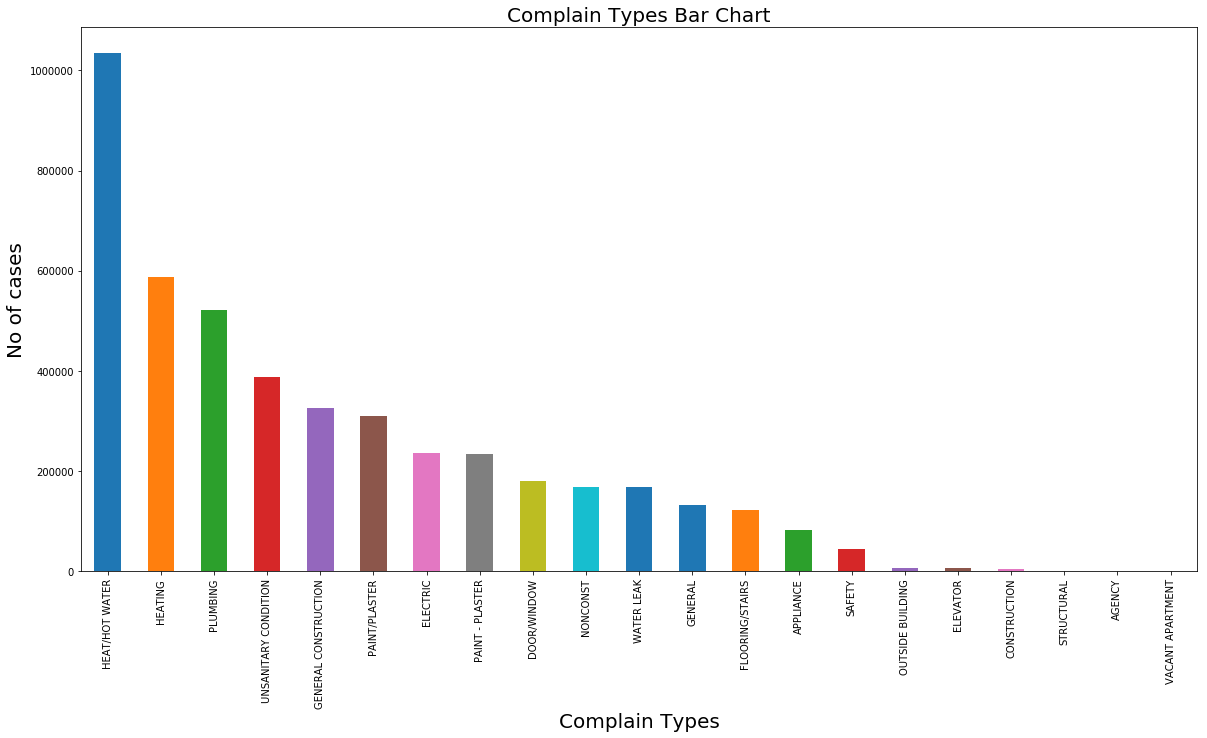

In [20]:
plt.figure(figsize=(20,10))
df['complaint_type'].value_counts().plot.bar()
plt.xlabel('Complain Types', size=20)
plt.ylabel('No of cases', size=20)
plt.title('Complain Types Bar Chart', size=20)

### Answer is Heat/Hot Water is top complain type

## Question 2: What Areas Should the Agency Focus On?

***

### Doing counting per borough and drill down to Heat/Hot Water. This is done after eliminating Unspecified

In [ ]:
df['complaint_type'].value_counts()

In [ ]:
df['borough'].value_counts()

In [ ]:
df['incident_zip'].value_counts()

In [49]:
#Basic Selection
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BROOKLYN')]

,borough,city,complaint_type,incident_address,incident_zip
165,BROOKLYN,BROOKLYN,HEAT/HOT WATER,435 GRAND AVENUE,11238.0
170,BROOKLYN,BROOKLYN,HEAT/HOT WATER,273 LEE AVENUE,11206.0
175,BROOKLYN,BROOKLYN,HEAT/HOT WATER,271 MARTENSE STREET,11226.0
176,BROOKLYN,BROOKLYN,HEAT/HOT WATER,49 CLARKSON AVENUE,11226.0
178,BROOKLYN,BROOKLYN,HEAT/HOT WATER,652 55 STREET,11220.0
179,BROOKLYN,BROOKLYN,HEAT/HOT WATER,273 HALSEY STREET,11216.0
183,BROOKLYN,BROOKLYN,HEAT/HOT WATER,523 KNICKERBOCKER AVENUE,11221.0
185,BROOKLYN,BROOKLYN,HEAT/HOT WATER,263 STOCKHOLM STREET,11237.0
186,BROOKLYN,BROOKLYN,HEAT/HOT WATER,163 MADISON STREET,11216.0
190,BROOKLYN,BROOKLYN,HEAT/HOT WATER,2913 FOSTER AVENUE,11210.0


In [50]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BROOKLYN')].count()

borough             317057
city                317057
complaint_type      317057
incident_address    317057
incident_zip        317057
dtype: int64

In [51]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BRONX')]

,borough,city,complaint_type,incident_address,incident_zip
13,BRONX,BRONX,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0
14,BRONX,BRONX,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0
189,BRONX,BRONX,HEAT/HOT WATER,2995 BOTANICAL SQUARE,10458.0
192,BRONX,BRONX,HEAT/HOT WATER,2351 GRAND CONCOURSE,10468.0
205,BRONX,BRONX,HEAT/HOT WATER,750 GRAND CONCOURSE,10451.0
221,BRONX,BRONX,HEAT/HOT WATER,888 GRAND CONCOURSE,10451.0
231,BRONX,BRONX,HEAT/HOT WATER,883 EAST 180 STREET,10460.0
232,BRONX,BRONX,HEAT/HOT WATER,1834 PHELAN PLACE,10453.0
475,BRONX,BRONX,HEAT/HOT WATER,930 SHERIDAN AVENUE,10451.0
476,BRONX,BRONX,HEAT/HOT WATER,888 GRAND CONCOURSE,10451.0


In [58]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'BRONX')].count()

borough             335722
city                335722
complaint_type      335722
incident_address    335722
incident_zip        335722
dtype: int64

In [52]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'MANHATTAN')]

,borough,city,complaint_type,incident_address,incident_zip
174,MANHATTAN,NEW YORK,HEAT/HOT WATER,3580 BROADWAY,10031.0
184,MANHATTAN,NEW YORK,HEAT/HOT WATER,631 HUDSON STREET,10014.0
187,MANHATTAN,NEW YORK,HEAT/HOT WATER,489 BROADWAY,10012.0
191,MANHATTAN,NEW YORK,HEAT/HOT WATER,551 WEST 157 STREET,10032.0
200,MANHATTAN,NEW YORK,HEAT/HOT WATER,135 ELDRIDGE STREET,10002.0
201,MANHATTAN,NEW YORK,HEAT/HOT WATER,2 WEST 129 STREET,10027.0
216,MANHATTAN,NEW YORK,HEAT/HOT WATER,140 EAST 28 STREET,10016.0
217,MANHATTAN,NEW YORK,HEAT/HOT WATER,3851 BROADWAY,10032.0
220,MANHATTAN,NEW YORK,HEAT/HOT WATER,183 EAST 3 STREET,10009.0
454,MANHATTAN,NEW YORK,HEAT/HOT WATER,502 WEST 142 STREET,10031.0


In [59]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'MANHATTAN')].count()

borough             234135
city                234135
complaint_type      234135
incident_address    234135
incident_zip        234135
dtype: int64

In [53]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'STATEN ISLAND')]

,borough,city,complaint_type,incident_address,incident_zip
169,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,85 HOLLAND AVENUE,10303.0
180,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,256 CORSON AVENUE,10301.0
2168,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,1660 RICHMOND TERRACE,10310.0
2177,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,138 ST PAULS AVENUE,10301.0
2724,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,174 GRANDVIEW AVENUE,10303.0
2816,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,30 EBBITTS STREET,10306.0
3319,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,142 HENDRICKS AVENUE,10301.0
3719,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,320 VANDERBILT AVENUE,10304.0
3731,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,44 BRADLEY AVENUE,10314.0
3773,STATEN ISLAND,STATEN ISLAND,HEAT/HOT WATER,228 BENZIGER AVENUE,10301.0


In [60]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'STATEN ISLAND')].count()

borough             10174
city                10174
complaint_type      10174
incident_address    10174
incident_zip        10174
dtype: int64

In [54]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'QUEENS')]

,borough,city,complaint_type,incident_address,incident_zip
181,QUEENS,Far Rockaway,HEAT/HOT WATER,1314 CENTRAL AVENUE,11691.0
188,QUEENS,Jamaica,HEAT/HOT WATER,109-12 176 STREET,11433.0
193,QUEENS,Jackson Heights,HEAT/HOT WATER,34-18 91 STREET,11372.0
197,QUEENS,Corona,HEAT/HOT WATER,97-05 HORACE HARDING EXPRESSWAY,11368.0
208,QUEENS,South Richmond Hill,HEAT/HOT WATER,97-38 110 STREET,11419.0
209,QUEENS,Astoria,HEAT/HOT WATER,20-72A STEINWAY STREET,11105.0
218,QUEENS,South Richmond Hill,HEAT/HOT WATER,97-38 110 STREET,11419.0
222,QUEENS,Corona,HEAT/HOT WATER,97-05 HORACE HARDING EXPRESSWAY,11368.0
483,QUEENS,Corona,HEAT/HOT WATER,97-05 HORACE HARDING EXPRESSWAY,11368.0
487,QUEENS,Saint Albans,HEAT/HOT WATER,113-17 205 STREET,11412.0


In [61]:
df[(df['complaint_type'] == 'HEAT/HOT WATER') & (df['borough'] == 'QUEENS')].count()

borough             137128
city                137128
complaint_type      137128
incident_address    137128
incident_zip        137128
dtype: int64

In [55]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby('borough')
stats.count()

,city,complaint_type,incident_address,incident_zip
borough,,,,
BRONX,335722,335722,335722,335722
BROOKLYN,317057,317057,317057,317057
MANHATTAN,234135,234135,234135,234135
QUEENS,137128,137128,137128,137128
STATEN ISLAND,10174,10174,10174,10174


## Summary: BRONX has the highest HEAT/HOT WATER complains.

In [62]:
df[df['complaint_type'] == 'HEAT/HOT WATER'].count()

borough             1034216
city                1034216
complaint_type      1034216
incident_address    1034216
incident_zip        1034216
dtype: int64

In [56]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby('incident_zip')
stats.count()

,borough,city,complaint_type,incident_address
incident_zip,,,,
10001.0,1958,1958,1958,1958
10002.0,7472,7472,7472,7472
10003.0,5557,5557,5557,5557
10004.0,36,36,36,36
10005.0,40,40,40,40
10006.0,134,134,134,134
10007.0,110,110,110,110
10009.0,6991,6991,6991,6991
10010.0,2126,2126,2126,2126


In [57]:
stats = df[df['complaint_type'] == 'HEAT/HOT WATER'].groupby(['borough','incident_zip','incident_address'])
stats.count()

city  complaint_type
borough       incident_zip incident_address                             
BRONX         10451.0      1000 GRAND CONCOURSE       47              47
                           1020 GRAND CONCOURSE        1               1
                           105 EAST  158 STREET        1               1
                           109 EAST  153 STREET      484             484
                           109 EAST 153 STREET        60              60
                           110 EAST  138 STREET        1               1
                           121 EAST  150 STREET        1               1
                           143 EAST  149 STREET       38              38
                           143 EAST 149 STREET         5               5
                           146 EAST 150 STREET         1               1
                           148 EAST  150 STREET        6               6
                           149 EAST 149 STREET         2               2
                           153 EAST  149 STREET        3               3
                           158 GERARD AVENUE           1               1
                           170 GERARD AVENUE           1               1
                           175 EAST  151 STREET       82              82
                           175 EAST 151 STREET        12              12
                           180 EAST  162 STREET       19              19
                           180 EAST  163 STREET       40              40
                           180 EAST 162 STREET        16              16
                           180 EAST 163 STREET        17              17
                           181 EAST  161 STREET       44              44
                           181 EAST 161 STREET        22              22
                           185 EAST  159 STREET       15              15
                           185 EAST  162 STREET       22              22
                           185 EAST  163 STREET        2               2
                           185 EAST 159 STREET        11              11
                           185 EAST 162 STREET        23              23
                           203 GRAND CONCOURSE         1               1
                           209 EAST  163 STREET        1               1
...                                                  ...             ...
STATEN ISLAND 10314.0      68 RIVINGTON AVENUE         1               1
                           69 ELSON STREET             3               3
                           69 LEWISTON STREET          1               1
                           7 WELLINGTON COURT          1               1
                           70 CROFT PLACE              1               1
                           72 DRAPER PLACE             1               1
                           72 MILDRED AVENUE           1               1
                           74 CASWELL AVENUE           3               3
                           74 CROFT PLACE             23              23
                           75 DAWSON CIRCLE            1               1
                           76 WINDSOR ROAD             1               1
                           77 DONGAN AVENUE            1               1
                           80 RICHMOND HILL ROAD      19              19
                           800 MANOR ROAD              2               2
                           801 WILLOW ROAD WEST        2               2
                           81 FRASER STREET            1               1
                           82 MULBERRY AVENUE          3               3
                           827 GOETHALS ROAD NORTH     1               1
                           85 COMSTOCK AVENUE          1               1
                           86 MADISON AVENUE           1               1
                           887 MANOR ROAD              2               2
                           9 DONNA COURT               2               2
                           9 GADSEN P

***

### Using borough, incident zip and incident address to find out and calculate each complaint type which is displayed on the right

In [7]:
df['borough'].value_counts()

BROOKLYN         1552069
BRONX            1424569
MANHATTAN         925683
Unspecified       796040
QUEENS            566436
STATEN ISLAND      77271
Name: borough, dtype: int64

In [8]:
df.borough.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'QUEENS',
       'Unspecified'], dtype=object)

In [9]:
df[df.borough == "Unspecified"]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
273643,ADDRESS,Unspecified,BROOKLYN,1/29/2010 12:00:00 AM,PLUMBING,1/1/2010 12:00:00 AM,84 ROSS STREET,11211.0,40.703784,RESIDENTIAL BUILDING,-73.963389,The Department of Housing Preservation and Dev...,Closed,ROSS STREET,15634790
273645,ADDRESS,Unspecified,BRONX,1/4/2010 12:00:00 AM,HEATING,1/1/2010 12:00:00 AM,776 MACE AVENUE,10467.0,40.863151,RESIDENTIAL BUILDING,-73.864339,The Department of Housing Preservation and Dev...,Closed,MACE AVENUE,15634798
273652,ADDRESS,Unspecified,BRONX,1/22/2010 12:00:00 AM,NONCONST,1/1/2010 12:00:00 AM,1201 FINDLAY AVENUE,10456.0,40.832150,RESIDENTIAL BUILDING,-73.912702,The Department of Housing Preservation and Dev...,Closed,FINDLAY AVENUE,15634840
273655,ADDRESS,Unspecified,BRONX,1/4/2010 12:00:00 AM,PLUMBING,1/2/2010 12:00:00 AM,2825 CLAFLIN AVENUE,10468.0,40.872514,RESIDENTIAL BUILDING,-73.899936,The Department of Housing Preservation and Dev...,Closed,CLAFLIN AVENUE,15634882
273679,ADDRESS,Unspecified,BROOKLYN,2/11/2010 12:00:00 AM,GENERAL CONSTRUCTION,1/1/2010 12:00:00 AM,413 EAST 98 STREET,11212.0,40.658245,RESIDENTIAL BUILDING,-73.915388,The Department of Housing Preservation and Dev...,Closed,EAST 98 STREET,15634979
273710,ADDRESS,Unspecified,BROOKLYN,1/7/2010 12:00:00 AM,ELECTRIC,1/1/2010 12:00:00 AM,1159 EASTERN PARKWAY,11213.0,40.668740,RESIDENTIAL BUILDING,-73.929902,The Department of Housing Preservation and Dev...,Closed,EASTERN PARKWAY,15635122
273737,ADDRESS,Unspecified,BROOKLYN,2/16/2010 12:00:00 AM,GENERAL CONSTRUCTION,1/1/2010 12:00:00 AM,321 44 STREET,11220.0,40.650631,RESIDENTIAL BUILDING,-74.010397,The Department of Housing Preservation and Dev...,Closed,44 STREET,15635225
273743,ADDRESS,Unspecified,BROOKLYN,1/18/2010 12:00:00 AM,GENERAL CONSTRUCTION,1/1/2010 12:00:00 AM,2913 FOSTER AVENUE,11210.0,40.638571,RESIDENTIAL BUILDING,-73.949005,The Department of Housing Preservation and Dev...,Closed,FOSTER AVENUE,15635269
273795,ADDRESS,Unspecified,BROOKLYN,1/5/2010 12:00:00 AM,HEATING,1/1/2010 12:00:00 AM,526 44 STREET,11220.0,40.648010,RESIDENTIAL BUILDING,-74.006090,The Department of Housing Preservation and Dev...,Closed,44 STREET,15635569
273798,ADDRESS,Unspecified,BROOKLYN,1/6/2010 12:00:00 AM,HEATING,1/1/2010 12:00:00 AM,1305 LINCOLN PLACE,11213.0,40.669859,RESIDENTIAL BUILDING,-73.933051,The Department of Housing Preservation and Dev...,Closed,LINCOLN PLACE,15635592


In [10]:
df = df[~df.borough.str.contains("Unspecified")] ## Drop Unspecified

In [11]:
df[df.borough == "Unspecified"]

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key


In [12]:
df.borough.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'QUEENS'],
      dtype=object)

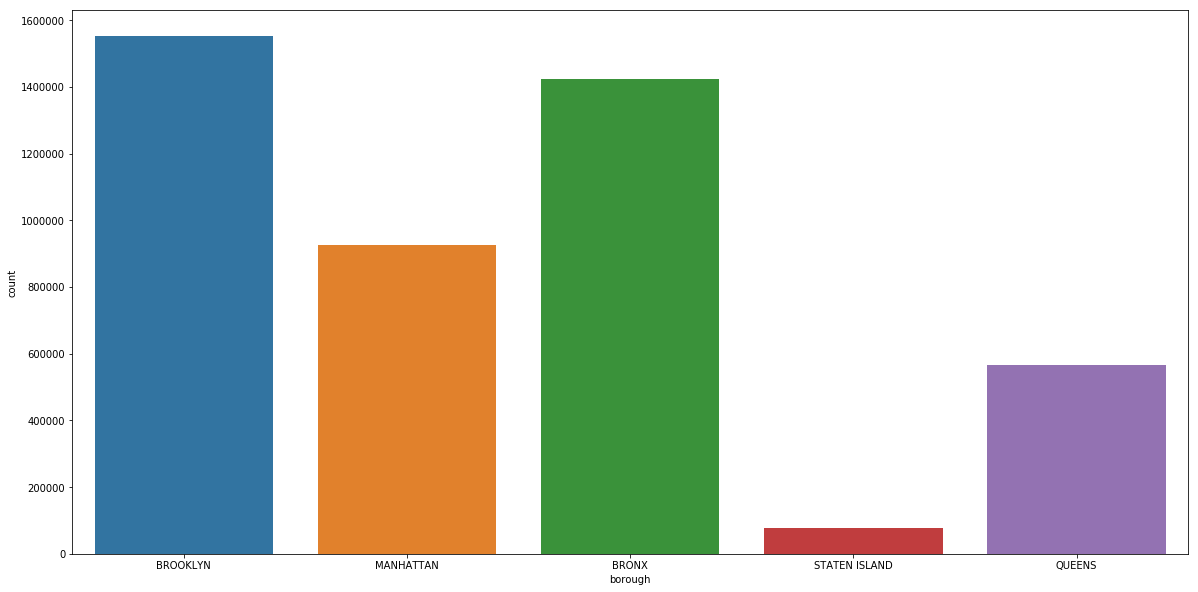

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.borough)

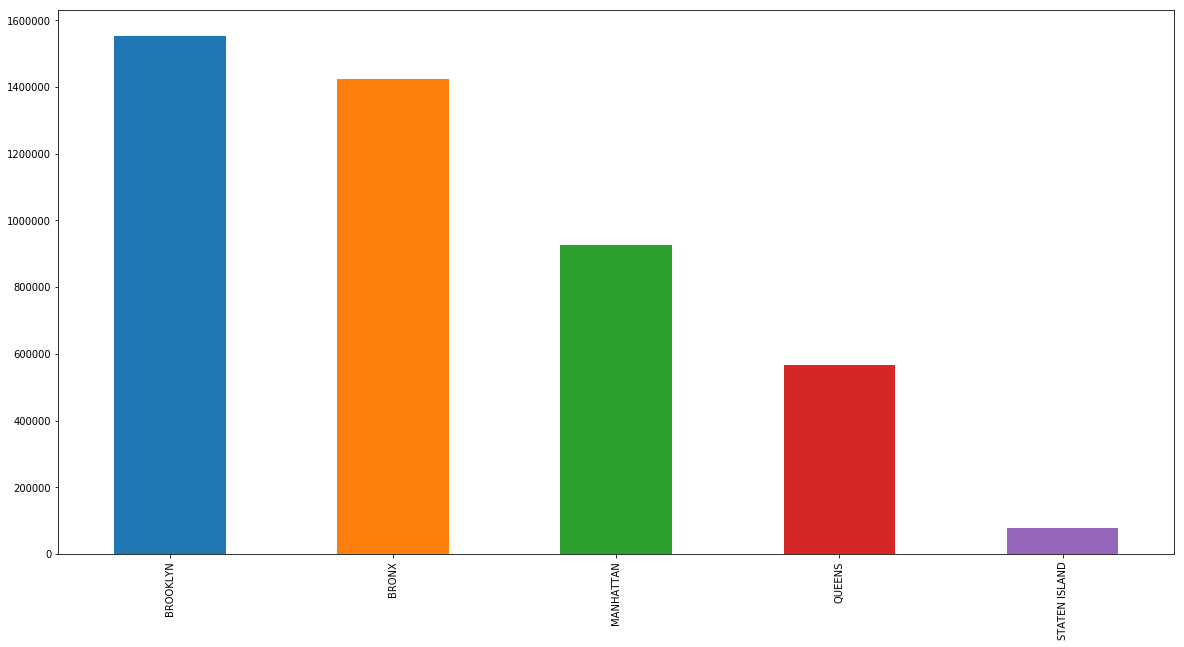

In [14]:
plt.figure(figsize=(20,10))
df['borough'].value_counts().plot.bar()

In [22]:
#df.to_csv('nyc311_modified.csv', index=False)  #Save the modified file for later use

In [37]:
#Create grouping
grp = df.groupby(['complaint_type','borough', 'incident_zip', 'incident_address'], as_index=True) 

In [38]:
grp.count()

city
complaint_type borough       incident_zip incident_address               
AGENCY         BRONX         10453.0      1890 ANDREWS AVENUE SOUTH     1
                             10459.0      1038 LOWELL STREET            1
                             10468.0      2297 SEDGWICK AVENUE          1
               BROOKLYN      11204.0      1725 61 STREET                1
               MANHATTAN     10031.0      454 WEST  146 STREET          1
                             10039.0      203 WEST  148 STREET          1
               QUEENS        11435.0      109-29 SUTPHIN BOULEVARD      1
                             11692.0      141 BEACH 56 PLACE            1
APPLIANCE      BRONX         10451.0      1000 GRAND CONCOURSE          2
                                          109 EAST  153 STREET          2
                                          109 EAST 153 STREET           3
                                          143 EAST  149 STREET          6
                                          143 EAST 149 STREET           4
                                          149 EAST  149 STREET          4
                                          175 EAST  151 STREET          2
                                          175 EAST 151 STREET           4
                                          180 EAST  162 STREET          1
                                          180 EAST  163 STREET         10
                                          180 EAST 163 STREET           1
                                          185 EAST  162 STREET          5
                                          214 EAST  163 STREET         13
                                          214 EAST 163 STREET           5
                                          225 EAST  149 STREET          4
                                          225 EAST 163 STREET           1
                                          235 EAST  149 STREET          2
                                          235 EAST 149 STREET           2
                                          237 EAST  163 STREET          1
                                          245 EAST  149 STREET          2
                                          245 EAST 149 STREET           1
                                          250 GRAND CONCOURSE           1
...                                                                   ...
WATER LEAK     STATEN ISLAND 10314.0      472 INGRAM AVENUE             1
                                          49 COUNTRY DRIVE WEST         1
                                          49 RICHARD LANE               1
                                          5 BOONE STREET                1
                                          5 COMMERCE STREET             1
                                          5 WINDHAM LOOP                2
                                          50 PLYMOUTH ROAD              1
                                          51 BOONE STREET               1
                                          52 NEHRING AVENUE             1
                                          526 TRAVIS AVENUE             1
                                          527 WILLOWBROOK ROAD          3
                                          57 CARPENTER AVENUE           1
                                          57 DARCEY AVENUE              1
                                          583 STEWART AVENUE            3
                                          60 WATCHOGUE ROAD             1
                                          635 GOETHALS ROAD NORTH       2
                                          67 STONE LANE                 1
                                          7 LEONA STREET                1
                                          7 LIVINGSTON AVENUE           2
                                          72 DRAPER PLACE               1
                                          74 CROFT PLACE                2
                                          76 WINDSOR ROAD               1

In [39]:
pd.DataFrame = grp.count()  #Assign to a new dataframe

In [40]:
newdf = pd.DataFrame

In [41]:
newdf

city
complaint_type borough       incident_zip incident_address               
AGENCY         BRONX         10453.0      1890 ANDREWS AVENUE SOUTH     1
                             10459.0      1038 LOWELL STREET            1
                             10468.0      2297 SEDGWICK AVENUE          1
               BROOKLYN      11204.0      1725 61 STREET                1
               MANHATTAN     10031.0      454 WEST  146 STREET          1
                             10039.0      203 WEST  148 STREET          1
               QUEENS        11435.0      109-29 SUTPHIN BOULEVARD      1
                             11692.0      141 BEACH 56 PLACE            1
APPLIANCE      BRONX         10451.0      1000 GRAND CONCOURSE          2
                                          109 EAST  153 STREET          2
                                          109 EAST 153 STREET           3
                                          143 EAST  149 STREET          6
                                          143 EAST 149 STREET           4
                                          149 EAST  149 STREET          4
                                          175 EAST  151 STREET          2
                                          175 EAST 151 STREET           4
                                          180 EAST  162 STREET          1
                                          180 EAST  163 STREET         10
                                          180 EAST 163 STREET           1
                                          185 EAST  162 STREET          5
                                          214 EAST  163 STREET         13
                                          214 EAST 163 STREET           5
                                          225 EAST  149 STREET          4
                                          225 EAST 163 STREET           1
                                          235 EAST  149 STREET          2
                                          235 EAST 149 STREET           2
                                          237 EAST  163 STREET          1
                                          245 EAST  149 STREET          2
                                          245 EAST 149 STREET           1
                                          250 GRAND CONCOURSE           1
...                                                                   ...
WATER LEAK     STATEN ISLAND 10314.0      472 INGRAM AVENUE             1
                                          49 COUNTRY DRIVE WEST         1
                                          49 RICHARD LANE               1
                                          5 BOONE STREET                1
                                          5 COMMERCE STREET             1
                                          5 WINDHAM LOOP                2
                                          50 PLYMOUTH ROAD              1
                                          51 BOONE STREET               1
                                          52 NEHRING AVENUE             1
                                          526 TRAVIS AVENUE             1
                                          527 WILLOWBROOK ROAD          3
                                          57 CARPENTER AVENUE           1
                                          57 DARCEY AVENUE              1
                                          583 STEWART AVENUE            3
                                          60 WATCHOGUE ROAD             1
                                          635 GOETHALS ROAD NORTH       2
                                          67 STONE LANE                 1
                                          7 LEONA STREET                1
                                          7 LIVINGSTON AVENUE           2
                                          72 DRAPER PLACE               1
                                          74 CROFT PLACE                2
                                          76 WINDSOR ROAD               1

In [42]:
#Select highest complaint
newdf.xs('HEAT/HOT WATER')  

city
borough       incident_zip incident_address             
BRONX         10451.0      1000 GRAND CONCOURSE       47
                           1020 GRAND CONCOURSE        1
                           105 EAST  158 STREET        1
                           109 EAST  153 STREET      484
                           109 EAST 153 STREET        60
                           110 EAST  138 STREET        1
                           121 EAST  150 STREET        1
                           143 EAST  149 STREET       38
                           143 EAST 149 STREET         5
                           146 EAST 150 STREET         1
                           148 EAST  150 STREET        6
                           149 EAST 149 STREET         2
                           153 EAST  149 STREET        3
                           158 GERARD AVENUE           1
                           170 GERARD AVENUE           1
                           175 EAST  151 STREET       82
                           175 EAST 151 STREET        12
                           180 EAST  162 STREET       19
                           180 EAST  163 STREET       40
                           180 EAST 162 STREET        16
                           180 EAST 163 STREET        17
                           181 EAST  161 STREET       44
                           181 EAST 161 STREET        22
                           185 EAST  159 STREET       15
                           185 EAST  162 STREET       22
                           185 EAST  163 STREET        2
                           185 EAST 159 STREET        11
                           185 EAST 162 STREET        23
                           203 GRAND CONCOURSE         1
                           209 EAST  163 STREET        1
...                                                  ...
STATEN ISLAND 10314.0      68 RIVINGTON AVENUE         1
                           69 ELSON STREET             3
                           69 LEWISTON STREET          1
                           7 WELLINGTON COURT          1
                           70 CROFT PLACE              1
                           72 DRAPER PLACE             1
                           72 MILDRED AVENUE           1
                           74 CASWELL AVENUE           3
                           74 CROFT PLACE             23
                           75 DAWSON CIRCLE            1
                           76 WINDSOR ROAD             1
                           77 DONGAN AVENUE            1
                           80 RICHMOND HILL ROAD      19
                           800 MANOR ROAD              2
                           801 WILLOW ROAD WEST        2
                           81 FRASER STREET            1
                           82 MULBERRY AVENUE          3
                           827 GOETHALS ROAD NORTH     1
                           85 COMSTOCK AVENUE          1
                           86 MADISON AVENUE           1
                           887 MANOR ROAD              2
                           9 DONNA COURT               2
                           9 GADSEN PLACE             12
                           90 GARY COURT               2
                           90 RICHMOND HILL ROAD      53
                           91 LIVINGSTON AVENUE        4
                           93 DAWSON COURT             1
                           97 PORTAGE AVENUE           1
                           98 ADA DRIVE                1
                           98 JULES DRIVE              1

[88830 rows x 1 columns]

In [43]:
newdf.head()

city
complaint_type borough   incident_zip incident_address               
AGENCY         BRONX     10453.0      1890 ANDREWS AVENUE SOUTH     1
                         10459.0      1038 LOWELL STREET            1
                         10468.0      2297 SEDGWICK AVENUE          1
               BROOKLYN  11204.0      1725 61 STREET                1
               MANHATTAN 10031.0      454 WEST  146 STREET          1

In [63]:
#sns.barplot(x='complaint_type',data='newdf')

In [29]:
#newdf.xs('HEATING')

In [30]:
grpb = df.groupby(['borough', 'incident_zip'], as_index=True) 

In [31]:
grpb.count()

city  complaint_type  incident_address
borough       incident_zip                                          
BRONX         10451.0        48646           48646             48646
              10452.0       112345          112345            112345
              10453.0       123623          123623            123623
              10454.0        26551           26551             26551
              10455.0        36670           36670             36670
              10456.0       101351          101351            101351
              10457.0       108909          108909            108909
              10458.0       130890          130890            130890
              10459.0        54217           54217             54217
              10460.0        72303           72303             72303
              10461.0        27821           27821             27821
              10462.0        62480           62480             62480
              10463.0        53291           53291             53291
              10464.0          852             852               852
              10465.0         5329            5329              5329
              10466.0        54009           54009             54009
              10467.0       134035          134035            134035
              10468.0       112407          112407            112407
              10469.0        26215           26215             26215
              10470.0        15844           15844             15844
              10471.0         5600            5600              5600
              10472.0        72642           72642             72642
              10473.0        19142           19142             19142
              10474.0        15840           15840             15840
              10475.0         3553            3553              3553
              10803.0            4               4                 4
BROOKLYN      11201.0         9112            9112              9112
              11203.0        66310           66310             66310
              11204.0        24381           24381             24381
              11205.0        14415           14415             14415
...                            ...             ...               ...
QUEENS        11421.0         9510            9510              9510
              11422.0         5632            5632              5632
              11423.0         8958            8958              8958
              11426.0          767             767               767
              11427.0         4163            4163              4163
              11428.0         2891            2891              2891
              11429.0         5259            5259              5259
              11430.0            2               2                 2
              11432.0        20819           20819             20819
              11433.0        15181           15181             15181
              11434.0        15995           15995             15995
              11435.0        16430           16430             16430
              11436.0         4773            4773              4773
              11691.0        36635           36635             36635
              11692.0         9348            9348              9348
              11693.0         3851            3851              3851
              11694.0         8228            8228              8228
              11697.0          223             223               223
STATEN ISLAND 10301.0        18089           18089             18089
              10302.0         6994            6994              6994
              10303.0         8861            8861              8861
              10304.0        17714           17714             17714
              10305.0         4681            4681              4681
              10306.0         5373            5373              5373
              10307.0          583             583               583
              10308.0       

In [ ]:
pd.DataFrame = grpb.count()  #Assign to a new dataframe

In [ ]:
borough = pd.DataFrame

In [ ]:
borough

In [ ]:
borough.xs('MANHATTAN')

In [ ]:
sns.countplot(x=borough)

In [ ]:
plt.figure(figsize=(20,10))
df['borough'].value_counts().plot.bar()

In [2]:
df1 = pd.read_csv('nyc311_modified.csv')

In [3]:
df1.head()

,Unnamed: 0,borough,city,complaint_type,incident_address,incident_zip
0,0,BROOKLYN,BROOKLYN,DOOR/WINDOW,397 1 STREET,11215.0
1,1,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
2,2,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
3,3,BROOKLYN,BROOKLYN,DOOR/WINDOW,1555 NOSTRAND AVENUE,11226.0
4,4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0


In [4]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df1.columns.values

array(['borough', 'city', 'complaint_type', 'incident_address',
       'incident_zip'], dtype=object)

In [9]:
df1.isnull().sum()

borough             0
city                0
complaint_type      0
incident_address    0
incident_zip        0
dtype: int64

In [12]:
#df1.to_csv('nyc311_modified2.csv', index=False)

In [ ]:
#df.pivot(index='complaint_type', columns='incident_zip')

In [ ]:
#pd.pivot_table(df,index=['complaint_type','borough','incident_zip','incident_address'])

In [ ]:
#table = pd.pivot_table(df,index=['complaint_type','borough','incident_zip','incident_address'])

In [ ]:
#pd.options.display.max_rows = 999  #Can increase but longer load times
#table.query('complaint_type == ["HEAT/HOT WATER"]').head(10)

In [ ]:
#table.query('complaint_type == ["HEAT/HOT WATER"]').count()

## Question 3: What Is the Relationship between Housing Characteristics and Complaints?

### Section for PLUTO Dataset



### Column Name                                          Description
***
1.Address:	       An address for the tax lot.(STRING)<br>
2.BldgArea:        The total gross area in square feet.(NUMERIC)<br>
3.BldgDepth:       The building’s depth, which is the effective perpendicular distance, measured in feet.(NUMERIC)<br>
4.BuiltFAR:        Total building floor area divided by the area of the tax lot.(NUMERIC)<br>
5.CommFAR:         The Maximum Allowable Commercial Floor Area Ratio(NUMERIC)<br>
6.FacilFAR:        The Maximum Allowable Community Facility Floor Area Ratio(NUMERIC).<br>
7.Lot:             The number of the tax lot.(DISCRETE)<br>
8.LotArea:         Total area of the tax lot, expressed in square feet rounded to the nearest integer.(NUMERIC)<br>
9.LotDepth:        The tax lot's depth measured in feet.(NUMERIC)<br>
10.NumBldgs:       The number of buildings on the tax lot.(NUMERIC)<br>
11.NumFloors:      In the tallest building on the tax lot, the number of full and partial stories starting from the ground floor.(NUMERIC)<br>
12.OfficeArea:    An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.(NUMERIC)<br>
13.ResArea:       An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.(NUMERIC)<br>
14.ResidFAR:      The Maximum Allowable Residential Floor Area Ratio.(NUMERIC)<br>
15.RetailArea:    An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.(NUMERIC)<br>
16.YearBuilt:    The year construction of the building was completed.(DISCRETE)<br>
17.YearAlter1:   If a building has been altered more than once, YEAR ALTERED 1 is the year of the second most recent alteration.(DISCRETE)<br>
18.ZipCode:    The zip code that the tax lot is located in.(NUMERIC)<br>
19.YCoord:     The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot.(NUMERIC)<br>
20.XCoord:     The X coordinate of the XY coordinate pair which depicts the approximate location of the lot.(NUMERIC)<br>


In [2]:
df2 = pd.read_csv('Bronx_18v1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2new = df2[['Address','BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
              'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

In [5]:
df2new.shape  #89854 rows, 20 columns

(89854, 20)

In [7]:
df2new.columns.values

array(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
       'YearAlter1', 'ZipCode', 'YCoord', 'XCoord'], dtype=object)

In [9]:
df2new.dtypes

Address        object
BldgArea        int64
BldgDepth     float64
BuiltFAR      float64
CommFAR       float64
FacilFAR      float64
Lot             int64
LotArea         int64
LotDepth      float64
NumBldgs        int64
NumFloors     float64
OfficeArea      int64
ResArea         int64
ResidFAR      float64
RetailArea      int64
YearBuilt       int64
YearAlter1      int64
ZipCode       float64
YCoord        float64
XCoord        float64
dtype: object

In [10]:
df2new.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [11]:
df2new['Address'].value_counts(sort=False)

1221 WARD AVENUE             1
628 VAN NEST AVENUE          1
228 BRINSMADE AVENUE         1
1819 ANDREWS AVENUE SOUTH    1
362 COURTLANDT AVENUE        1
496 EAST 189 STREET          1
1458 MINFORD PLACE           1
2875 SEDGWICK AVENUE         1
1263 EAST 222 STREET         1
1794 EAST 172 STREET         1
442 EAST 176 STREET          1
445 WEST 263 STREET          1
3015 PHILIP AVENUE           1
3143 HULL AVENUE             1
3402 WRIGHT AVENUE           1
647 MANIDA STREET            1
458 CYRUS PLACE              1
185 REVILLE STREET           1
1625 BAY SHORE AVENUE        1
1458 WARING AVENUE           1
1193 NEILL AVENUE            1
1745 MONTGOMERY AVENUE       1
1768 LACOMBE AVENUE          1
5915 LIEBIG AVENUE           1
4219 WEBSTER AVENUE          1
280 RESERVOIR PLACE          1
1916 HUNT AVENUE             1
3001 WEBSTER AVENUE          1
1640 PARKER STREET           1
2407 BUCK STREET             1
                            ..
180 REVERE AVENUE            1
411 FAIL

In [12]:
df2new['BldgArea'].value_counts(sort=False)

0         6423
2049        11
4098         2
6147         1
53274        1
2113         6
8260         2
28750        2
47191        1
128          1
2177         8
4226         4
6275         1
57500        7
192          1
2241        13
4290         5
12486        1
14535        1
20682        1
24780        2
30927        1
32976        1
86250        1
256          1
2305        10
8452         1
12550        2
43285        1
115000       2
          ... 
16056        1
3774         5
1727        13
98000        4
26355        1
16120        3
5885         1
3838         1
1791        21
73500        3
32560        1
12090        2
10043        1
3902         1
1855        10
49000        9
8060         3
1919         7
34735        1
24500       11
4030         5
1983         5
876500       1
81880        1
73692        1
30705        1
8188         5
6141         1
4094         1
2047         8
Name: BldgArea, Length: 11474, dtype: int64

In [13]:
df2new['BldgDepth'].value_counts(sort=False)
#Building Depth cannot be zero

0.00      6687
32.00     2769
64.00      461
128.00      15
6.00         3
2.00         1
8.00         5
40.32        2
142.17       1
48.64        1
126.08       1
78.42        1
57.28        1
192.33       1
29.83        3
249.00       1
56.75        5
46.08        8
62.42        5
29.67       10
107.52       1
45.99        1
98.17        2
42.65        2
58.60        3
60.42        3
36.10        1
128.25       1
121.00      23
35.25        5
          ... 
638.00       1
109.58       1
319.00       2
39.00     1041
57.50       20
244.00       3
53.26        4
78.53        1
152.50       1
65.83        4
97.67        3
25.33        2
149.00       2
100.68       1
112.33       1
31.66        1
118.58       1
94.56        1
35.50       79
116.67       1
28.84        1
138.50       1
123.08       1
28.70        1
31.58        2
540.00       3
131.50       1
31.65        1
31.60        2
127.58       1
Name: BldgDepth, Length: 2176, dtype: int64

In [14]:
df2new['BuiltFAR'].value_counts(sort=False)

0.00     6521
2.00      244
0.50      650
0.25      232
1.01      699
0.19      157
0.61      712
1.04      570
4.76       19
0.42      425
5.43       10
4.32       33
0.11       90
5.39        6
1.13      403
4.65       23
1.76       80
4.30       34
1.52      167
8.96        1
6.07        3
6.18        3
4.62       21
0.44      485
1.72       68
0.22      191
3.04       14
2.30       31
0.26      277
0.60      829
         ... 
5.65        4
5.70        4
3.48       52
0.02       49
0.34      342
3.64       24
6.79        1
6.26        1
1.21      278
0.29      318
3.11       13
6.05        1
6.77        1
5.28       15
3.91       31
6.87        1
7.48        1
7.06        2
7.13        1
9.80        1
25.68       1
6.35        1
5.91        3
4.56       29
7.21        1
2.57       20
5.60        6
7.98        1
3.89       28
7.90        1
Name: BuiltFAR, Length: 780, dtype: int64

In [15]:
df2new['CommFAR'].value_counts(sort=False)

5.0      106
2.0     2139
0.0    83828
0.5      335
3.0       11
4.2       58
9.0       17
1.0     2222
4.0      205
3.4      887
6.0       46
Name: CommFAR, dtype: int64

In [16]:
df2new['FacilFAR'].value_counts(sort=False)

0.00      1104
2.00     43644
1.00     12035
7.52        48
2.40      2008
10.00        7
3.00      1849
4.20       197
6.50      3947
4.00       767
9.00        17
4.80     23823
5.00       204
6.00       204
Name: FacilFAR, dtype: int64

In [17]:
df2new['Lot'].value_counts(sort=False)

2049      1
64      569
128     147
192      37
4290      1
256      21
320      18
384       4
448       6
512       7
576       2
640       2
704       2
8900      6
768       2
832       1
896       1
960       3
3009      1
1088      1
1152      2
1216      1
1280      2
1408      1
1472      1
1536      1
1664      1
1792      1
1920      1
1984      1
       ... 
1790      1
1918      1
2046      1
63      600
127     136
2238      1
191      32
255      20
319      15
383       5
447       4
2558      1
511       6
575       3
2686      1
639       2
2750      1
703       2
767       1
831       1
9083      1
895       2
1151      2
3262      1
1215      1
1279      1
1343      2
1535      3
3710      1
1791      1
Name: Lot, Length: 1960, dtype: int64

In [18]:
df2new['LotArea'].value_counts(sort=False)

0         301
2049        3
10245       2
14343       1
28686       1
64          1
2113       12
4162        1
8260        1
12358       1
28750       1
128         1
2177       35
4226        1
6275        2
8324        2
16520       1
57500       2
192         1
2241        8
4290       12
8388        1
18633       1
39123       1
49368       1
184538      1
2305        8
4354        2
10501       1
12550       2
         ... 
3774        6
1727        7
16120       1
12026       1
9979        1
5885        2
3838        7
1791       17
14137       1
5949        1
3902        1
1855       16
49000       2
16248       1
14201       1
12154       1
10107       2
8060        2
6013        2
3966        4
1919        6
24500       2
20406       1
4030        2
1983       39
79833       1
12282       2
6141        2
4094       12
2047        8
Name: LotArea, Length: 12063, dtype: int64

In [19]:
df2new['LotDepth'].value_counts(sort=False)

0.00      259
128.00     27
64.00      32
32.00      15
8.00        2
2.00        5
256.00      1
125.59      1
302.33      1
495.67      1
96.86       1
0.22        1
221.26      1
125.83      2
142.83      1
206.17      1
85.81       1
48.86       1
56.64       1
84.19       2
93.01       1
117.07      1
188.50      2
94.08      36
126.42     10
113.29      1
113.21      1
99.44       3
98.56       1
149.45      1
         ... 
499.00      1
39.25       2
112.09      2
31.92       1
122.04      1
122.46      2
136.21      1
120.65      1
121.33     10
266.50      1
121.17     13
62.01       3
149.99      2
213.35      1
125.45      1
89.99       3
119.64      1
119.86      3
120.57      2
131.50      6
124.71      1
208.69      2
54.44       1
127.58      4
259.50      1
87.56       1
86.44       1
7.95        1
24.83       2
122.82      1
Name: LotDepth, Length: 7725, dtype: int64

In [20]:
df2new['NumBldgs'].value_counts(sort=False)

0       6071
64         1
1      67052
129        1
2      15324
3        897
4        203
5         77
6         44
70         1
7         27
8         16
72         1
9         15
10        15
74         1
11        10
12         9
13         5
14         8
78         1
15         5
16         4
208        1
17         4
18         3
82         1
19         2
20         3
21         3
22         3
23         2
24         2
26         3
91         1
28         1
29         1
30         2
31         3
33         1
35         3
100        1
37         2
230        1
39         4
40         1
41         1
44         1
46         2
47         1
48         2
52         1
54         3
55         1
57         2
58         2
251        1
62         1
Name: NumBldgs, dtype: int64

In [21]:
df2new['NumFloors'].value_counts(sort=False)
#If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is greater than zero, then NUMBER OF FLOORS is not available for the tax lot.
#If the NUMBER OF FLOORS is zero and the NUMBER OF BUILDINGS is zero, then NUMBER OF FLOORS is not applicable for the tax lot.

0.00      6549
2.00     42187
4.00      1711
8.00       160
0.50         1
1.33         1
25.00        6
18.00       11
44.00        1
33.00        2
10.00       43
3.50        61
29.00        1
22.00        7
4.50         1
17.00        5
3.00     15207
20.00       25
1.50      1531
14.00       42
3.75        18
2.50      5077
2.67        20
42.00        1
30.00        5
23.00        2
13.00       38
1.00      9033
12.00       51
16.00       24
9.00        77
5.50         1
5.00      3239
2.25         9
28.00        2
11.00       39
31.00        1
19.00       13
6.00      2172
1.75       716
24.00        1
1.67       341
7.00       233
2.75      1165
1.25         1
21.00       12
15.00       11
Name: NumFloors, dtype: int64

In [22]:
df2new['OfficeArea'].value_counts(sort=False)

0         87319
128           1
4226          1
43285         1
320           3
4482          1
16776         1
512           3
25100         1
66080         1
640           2
66208         1
8900          1
17224         1
960           3
1024          1
1088          2
1152          2
5250          4
34000         1
1280          2
1344          1
1408          1
17800         1
1472          1
1600         15
17992         1
1728          4
1920          4
59292         1
          ...  
1150          3
30000         4
23925         1
5500          1
1470          1
1598          1
9850          1
5884          2
1790          1
3903          1
2110          1
14520         1
2238          1
2430          1
2494          1
211608        1
2750          2
15160         1
831           1
11194         1
3006          1
959           1
1087          1
11450         1
3262          2
1215          2
89300         1
1535          1
7740          1
7868          1
Name: OfficeArea, Length

In [23]:
df2new['ResArea'].value_counts(sort=False)

0         14487
2049          5
53274         1
2113         10
20554         1
28750         2
2177          4
4226          2
57500         7
2241          9
4290          3
24780         1
30927         1
32976         1
37074         1
86250         1
2305          2
12550         1
98608         1
115000        2
2369          4
10565         1
41300         1
51545         1
2433          2
8580         12
18825         1
39315         1
86442         1
448           1
          ...  
1599          8
24180         1
3710          3
1663          2
61090         1
30385         1
26291         1
20150         1
3774          4
1727          1
98000         2
16120         3
3838          1
1791          8
73500         3
63265         1
32560         1
18231         1
3902          1
1855          8
49000        11
8060          2
1919          4
34735         1
24500         8
4030          3
1983          4
8188          4
4094          1
2047          3
Name: ResArea, Length: 8

In [24]:
df2new['ResidFAR'].value_counts(sort=False)

0.00      4358
0.50      1573
2.00      1054
3.44     12083
7.52        49
2.43     11990
10.00        6
0.90     26374
3.00      1849
1.25     12901
4.20       197
3.75        32
4.00       767
6.02      2416
1.10      2824
9.00        17
0.60     10462
5.00       172
7.20        14
1.35       491
6.00       204
5.40        21
Name: ResidFAR, dtype: int64

In [25]:
df2new['RetailArea'].value_counts(sort=False)

0         83962
4098          1
8260          1
6275          1
4290          1
12550         1
2369          1
2433          1
448           1
2497          1
4610          1
576           2
2625          4
12870         1
640           5
704           1
768           1
832           2
896           1
2945          1
4994          1
960          12
7107          1
1024          1
9220          1
5250          9
249017        1
1216          1
1280          6
1344          5
          ...  
10362         1
4221          1
6332          1
255           1
2366          2
2494          1
575           1
2686          1
6844          1
4797          1
2750         11
703           1
4925          1
7100          2
3070          3
1023          2
1087          2
11450         1
1215          4
1279          1
23860         1
7484          1
15800         1
7612          1
1535          1
16056         1
12218         1
4030          1
6141          2
2047          1
Name: RetailArea, Length

In [26]:
df2new['YearBuilt'].value_counts(sort=False)
#Year Built is accurate for the decade but not necessarily for the specific year.
#Two outliers – 1910 & 1920. Structures built between 1800s and early 1900s usually have a Year Built date of either 1910 or 1920.

0       6367
1920    7550
1984      52
1921     116
1985     201
1922     249
1986     174
1923     291
1987     446
1924     534
1988     398
1925    6343
1989     330
1926     776
1990     363
1927    1085
1991     447
1800      55
1928     986
1992     642
1929     529
1993     520
1930    5856
1994     248
1931    3224
1995     327
1868       1
1932     210
1996     294
1933      96
        ... 
1971      79
1780       1
1908      61
1972      94
1909     133
1973      91
1910    3870
1974     106
1911     181
1975     444
1848       1
1912     175
1976      53
1849       1
1913     218
1977      36
1850       1
1914     104
1978      43
1915    1738
1979      50
1916     146
1980     124
1853       1
1917      89
1981      44
1918      45
1982      51
1919      35
1983      46
Name: YearBuilt, Length: 146, dtype: int64

In [27]:
df2new['YearAlter1'].value_counts(sort=False)

0       81912
1920        3
1984       68
1921        2
1985       69
1922        5
1986       75
1923        1
1987       82
1924        1
1988      113
1925        4
1989       99
1926        2
1990      180
1927        1
1991      292
1992      173
1929        2
1993      202
1930        3
1994      296
1931        3
1995      196
1932        1
1996      263
1933        1
1997      202
1998      247
1935        1
        ...  
1967       23
1968       13
1905        1
1969       13
1906        1
1970       11
1971        9
1908        1
1972       20
1973       19
1910        1
1974       33
1911        2
1975       27
1912        2
1976       22
1913        3
1977       32
1914        1
1978       32
1915        4
1979       48
1916        2
1980       70
1917        1
1981       48
1918        2
1982       75
1919        1
1983       72
Name: YearAlter1, Length: 109, dtype: int64

In [28]:
df2new['ZipCode'].value_counts(sort=False)

10451.0     1228
10452.0     1548
10453.0     2102
10454.0     1746
10455.0     1793
10456.0     2876
10457.0     3028
10458.0     2769
10459.0     2605
10460.0     2892
10461.0     7499
10462.0     4671
10463.0     2247
10464.0     1550
10465.0     8163
10466.0     9229
10467.0     4673
10468.0     1627
10469.0    11349
10470.0     2334
10471.0     2352
10472.0     4329
10473.0     4870
10474.0     1220
10475.0      823
11370.0        2
Name: ZipCode, dtype: int64

In [29]:
df2new['YCoord'].value_counts(sort=False)

262144.0    2
262146.0    1
262147.0    2
262148.0    2
262149.0    1
262150.0    1
262151.0    3
262152.0    1
262153.0    3
262154.0    1
262157.0    1
262159.0    3
262160.0    1
262161.0    3
262163.0    3
262164.0    1
262165.0    1
262166.0    1
262167.0    1
262168.0    3
262169.0    4
262170.0    2
262171.0    1
262172.0    3
262173.0    1
262174.0    2
262176.0    2
262177.0    2
262179.0    1
262180.0    2
           ..
262107.0    3
262108.0    3
262111.0    2
262112.0    1
262113.0    1
262114.0    4
262115.0    1
262116.0    2
262118.0    3
262119.0    2
262122.0    2
262123.0    2
262124.0    2
262125.0    1
262126.0    1
262127.0    2
262128.0    4
262129.0    1
262130.0    1
262131.0    3
262133.0    4
262134.0    1
262136.0    2
262137.0    1
262138.0    1
262139.0    1
262140.0    2
262141.0    1
262142.0    1
262143.0    2
Name: YCoord, Length: 33050, dtype: int64

In [30]:
df2new['XCoord'].value_counts(sort=False)

1002677.0    1
1002831.0    1
1002856.0    1
1002895.0    1
1002904.0    1
1002937.0    1
1002938.0    1
1002974.0    1
1002982.0    1
1002987.0    1
1003001.0    1
1003007.0    1
1003015.0    1
1003044.0    1
1003067.0    1
1003098.0    1
1003121.0    1
1003127.0    1
1003138.0    1
1003145.0    2
1003147.0    1
1003155.0    1
1003165.0    1
1003166.0    1
1003171.0    1
1003183.0    1
1003190.0    1
1003197.0    1
1003203.0    1
1003204.0    1
            ..
1044437.0    1
1044439.0    1
1044452.0    1
1044463.0    1
1044467.0    1
1044486.0    1
1044494.0    2
1044498.0    1
1044500.0    1
1044507.0    1
1044525.0    1
1044534.0    1
1044562.0    1
1044579.0    1
1044583.0    1
1044586.0    1
1044593.0    1
1044608.0    1
1044644.0    1
1044687.0    1
1044698.0    1
1044724.0    1
1044776.0    1
1044803.0    1
1044830.0    1
1044883.0    1
1044890.0    1
1044952.0    1
1045112.0    1
1047777.0    1
Name: XCoord, Length: 29660, dtype: int64

In [31]:
#Are there any variables with missing values?
df2new.isnull().sum()

Address         69
BldgArea         0
BldgDepth        0
BuiltFAR         0
CommFAR          0
FacilFAR         0
Lot              0
LotArea          0
LotDepth         0
NumBldgs         0
NumFloors        0
OfficeArea       0
ResArea          0
ResidFAR         0
RetailArea       0
YearBuilt        0
YearAlter1       0
ZipCode        329
YCoord        3259
XCoord        3259
dtype: int64

In [32]:
#Drop all missing values from BK dataset
pd.options.mode.chained_assignment = None
df2new.dropna(axis=0, inplace=True)

In [33]:
df2new.isnull().sum()

Address       0
BldgArea      0
BldgDepth     0
BuiltFAR      0
CommFAR       0
FacilFAR      0
Lot           0
LotArea       0
LotDepth      0
NumBldgs      0
NumFloors     0
OfficeArea    0
ResArea       0
ResidFAR      0
RetailArea    0
YearBuilt     0
YearAlter1    0
ZipCode       0
YCoord        0
XCoord        0
dtype: int64

In [34]:
df2new.shape

(86591, 20)

In [35]:
#Change column Zipcode to incident_zip
df2new.columns = ['Address','BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
              'YearBuilt', 'YearAlter1', 'incident_zip', 'YCoord', 'XCoord']

In [36]:
df2new.columns.values

array(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
       'YearAlter1', 'incident_zip', 'YCoord', 'XCoord'], dtype=object)

In [37]:
df2new['incident_zip'].value_counts(sort=False)

10451.0     1128
10452.0     1478
10453.0     2041
10454.0     1649
10455.0     1754
10456.0     2802
10457.0     2956
10458.0     2721
10459.0     2558
10460.0     2805
10461.0     7324
10462.0     4513
10463.0     2140
10464.0     1403
10465.0     7853
10466.0     8965
10467.0     4577
10468.0     1580
10469.0    11078
10470.0     2269
10471.0     2135
10472.0     4266
10473.0     4719
10474.0     1153
10475.0      723
11370.0        1
Name: incident_zip, dtype: int64

### Drop unnecessary features

Using domain knowledge on the dataset, I decided to drop the following columns: <b>BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, OfficeArea, ResArea, ResidFAR, RetailArea, YCoord and XCoord. </b>

Features which represents area sizes have a lot of zeros which will impact model training later will be dropped.<br>

In [38]:
df2new.drop(['BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth','OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YCoord', 'XCoord'], axis=1, inplace=True)

In [39]:
df2new.shape  #86591 rows and 6 columns

(86591, 6)

In [40]:
df2new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86591 entries, 0 to 89845
Data columns (total 6 columns):
Address         86591 non-null object
NumBldgs        86591 non-null int64
NumFloors       86591 non-null float64
YearBuilt       86591 non-null int64
YearAlter1      86591 non-null int64
incident_zip    86591 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.6+ MB


In [48]:
#Eliminate zero number of floors as they are N/A info.
df2new['NumFloors'].value_counts(sort=False)

0.00      3613
2.00     42135
4.00      1700
8.00       154
0.50         1
1.33         1
25.00        5
18.00       10
44.00        1
33.00        2
10.00       43
3.50        61
22.00        7
4.50         1
17.00        5
3.00     15186
20.00       24
1.50      1528
14.00       42
3.75        18
2.50      5075
2.67        20
42.00        1
30.00        5
23.00        1
13.00       38
1.00      8823
12.00       48
16.00       23
9.00        77
5.50         1
5.00      3236
2.25         9
28.00        2
11.00       37
19.00       12
6.00      2171
1.75       715
24.00        1
1.67       341
7.00       231
2.75      1163
1.25         1
21.00       12
15.00       11
Name: NumFloors, dtype: int64

In [49]:
df2new[df2new.NumFloors == 0]

,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1,incident_zip
0,122 BRUCKNER BOULEVARD,1,0.0,0,0,10454.0
5,ST ANNS AVENUE,0,0.0,0,0,10454.0
13,180 EAST 132 STREET,0,0.0,0,0,10454.0
20,510 EAST 134 STREET,0,0.0,0,0,10454.0
62,501 EAST 136 STREET,0,0.0,0,0,10454.0
103,227 ST ANNS AVENUE,0,0.0,0,0,10454.0
137,549 EAST 139 STREET,0,0.0,0,0,10454.0
141,541 EAST 139 STREET,0,0.0,0,0,10454.0
151,340 BROOK AVENUE,0,0.0,0,0,10454.0
166,538 EAST 142 STREET,0,0.0,0,0,10454.0


In [50]:
df2new[df2new.NumFloors == 0].count()

Address         3613
NumBldgs        3613
NumFloors       3613
YearBuilt       3613
YearAlter1      3613
incident_zip    3613
dtype: int64

In [53]:
df2new = df2new[df2new.NumFloors != 0] ## Drop zero

In [54]:
df2new[df2new.NumFloors == 0].count()

Address         0
NumBldgs        0
NumFloors       0
YearBuilt       0
YearAlter1      0
incident_zip    0
dtype: int64

In [55]:
# Recheck again
df2new['NumFloors'].value_counts(sort=False)

1.00      8823
2.00     42135
16.00       23
8.00       154
0.50         1
1.33         1
25.00        5
18.00       10
44.00        1
33.00        2
10.00       43
3.50        61
22.00        7
4.50         1
17.00        5
3.00     15186
20.00       24
1.50      1528
14.00       42
3.75        18
2.50      5075
2.67        20
42.00        1
30.00        5
23.00        1
13.00       38
4.00      1700
12.00       48
9.00        77
5.50         1
5.00      3236
2.25         9
28.00        2
11.00       37
19.00       12
6.00      2171
1.75       715
24.00        1
1.67       341
7.00       231
2.75      1163
1.25         1
21.00       12
15.00       11
Name: NumFloors, dtype: int64

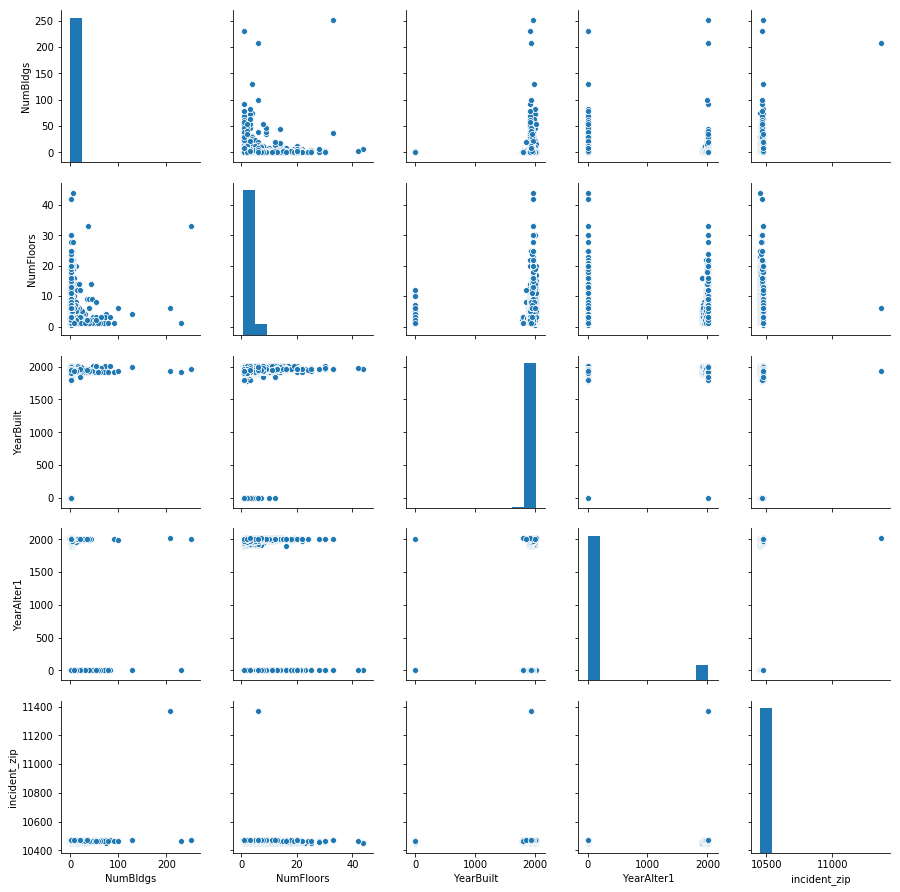

In [56]:
sns.pairplot(df2new)

In [57]:
df2new.head()

,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1,incident_zip
1,126 BRUCKNER BOULEVARD,2,1.0,1931,1994,10454.0
2,138 BRUCKNER BOULEVARD,1,2.0,1931,0,10454.0
3,144 BRUCKNER BOULEVARD,1,5.0,1931,2001,10454.0
4,148 BRUCKNER BOULEVARD,1,5.0,1920,2009,10454.0
6,519 EAST 132 STREET,2,1.0,1931,0,10454.0


In [58]:
df2new.shape #82978 rows and 6 columns

(82978, 6)

In [59]:
#Save a modified Bronx file
#df2new.to_csv("bronxmodified.csv", index=False)

In [60]:
df3 = pd.read_csv("nyc311_modified.csv")

In [61]:
df3.shape

(4546028, 5)

In [63]:
df3.head()

,borough,city,complaint_type,incident_address,incident_zip
0,BROOKLYN,BROOKLYN,DOOR/WINDOW,397 1 STREET,11215.0
1,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
2,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
3,BROOKLYN,BROOKLYN,DOOR/WINDOW,1555 NOSTRAND AVENUE,11226.0
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0


In [66]:
df3[df3.borough == "BROOKLYN"].count()

borough             1552069
city                1552069
complaint_type      1552069
incident_address    1552069
incident_zip        1552069
dtype: int64

In [67]:
df3[df3.borough == "MANHATTAN"].count()

borough             925683
city                925683
complaint_type      925683
incident_address    925683
incident_zip        925683
dtype: int64

In [68]:
df3[df3.borough == "QUEENS"].count()

borough             566436
city                566436
complaint_type      566436
incident_address    566436
incident_zip        566436
dtype: int64

In [69]:
df3[df3.borough == "STATEN ISLAND"].count()

borough             77271
city                77271
complaint_type      77271
incident_address    77271
incident_zip        77271
dtype: int64

In [70]:
df3[df3.borough == "BRONX"].count()

borough             1424569
city                1424569
complaint_type      1424569
incident_address    1424569
incident_zip        1424569
dtype: int64

### Drop except BRONX for borough feature

In [71]:
df3.borough.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'STATEN ISLAND', 'QUEENS'],
      dtype=object)

In [73]:
df3 = df3[~df3.borough.str.contains("BROOKLYN")] ## Drop BROOKLYN

In [76]:
df3 = df3[~df3.borough.str.contains("MANHATTAN")] ## Drop MANHATTAN

In [77]:
df3 = df3[~df3.borough.str.contains("STATEN ISLAND")] ## Drop STATEN ISLAND

In [78]:
df3 = df3[~df3.borough.str.contains("QUEENS")] ## Drop QUEENS

In [79]:
df3.shape

(1424569, 5)

In [80]:
df3.head()

,borough,city,complaint_type,incident_address,incident_zip
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0
6,BRONX,BRONX,DOOR/WINDOW,2414 EAST TREMONT AVENUE,10461.0
12,BRONX,BRONX,SAFETY,488 EAST 163 STREET,10451.0
13,BRONX,BRONX,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0
14,BRONX,BRONX,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0


In [81]:
#Save a modified NYC311 file
#df3.to_csv("nycbronx.csv", index=False)

In [83]:
df2new.head()

,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1,incident_zip
1,126 BRUCKNER BOULEVARD,2,1.0,1931,1994,10454.0
2,138 BRUCKNER BOULEVARD,1,2.0,1931,0,10454.0
3,144 BRUCKNER BOULEVARD,1,5.0,1931,2001,10454.0
4,148 BRUCKNER BOULEVARD,1,5.0,1920,2009,10454.0
6,519 EAST 132 STREET,2,1.0,1931,0,10454.0


In [84]:
df2new.drop(['Address','YearBuilt', 'YearAlter1'], axis=1, inplace=True)

In [85]:
df2new.head()

,NumBldgs,NumFloors,incident_zip
1,2,1.0,10454.0
2,1,2.0,10454.0
3,1,5.0,10454.0
4,1,5.0,10454.0
6,2,1.0,10454.0


In [92]:
df2.shape

(89854, 87)

In [86]:
df3.head()

,borough,city,complaint_type,incident_address,incident_zip
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0
6,BRONX,BRONX,DOOR/WINDOW,2414 EAST TREMONT AVENUE,10461.0
12,BRONX,BRONX,SAFETY,488 EAST 163 STREET,10451.0
13,BRONX,BRONX,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0
14,BRONX,BRONX,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0


In [87]:
df3.drop(['city','borough'], axis=1, inplace=True)

In [88]:
df3.head()

,complaint_type,incident_address,incident_zip
4,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0
6,DOOR/WINDOW,2414 EAST TREMONT AVENUE,10461.0
12,SAFETY,488 EAST 163 STREET,10451.0
13,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0
14,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0


In [90]:
df3.shape

(1424569, 3)

### Need to combine NYC311 and Bronx data together

In [89]:
pd.merge(df3,df2new,how='inner',on='incident_zip')

MemoryError: 